In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ZADANIE 1

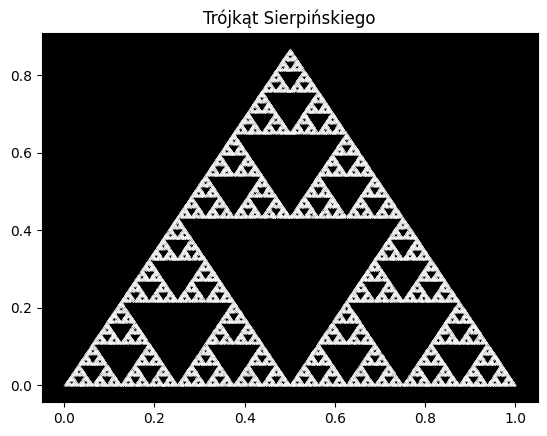

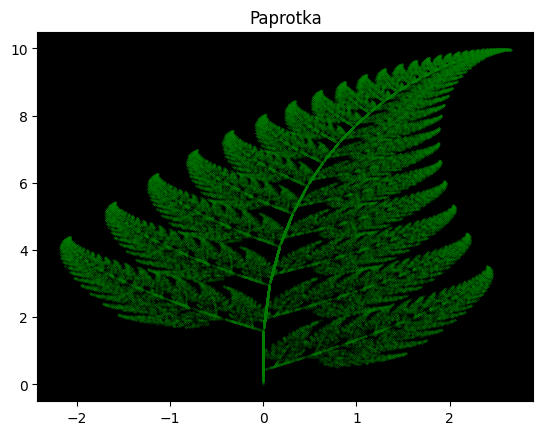

In [2]:
# creation of list of positions

steps_num = 100000
steps_num_small = 25000

positions = np.zeros([steps_num, 2])
paprotka = np.zeros([steps_num, 2])
positions_small = np.zeros([steps_num_small, 2])
paprotka_small = np.zeros([steps_num_small, 2])

# constants

m1 = [0.5, 0, 0, 0.5, 0.25, np.sqrt(3.)/4]
m2 = [0.5, 0, 0, 0.5, 0.0, 0]
m3 = [0.5, 0, 0, 0.5, 0.5, 0]

sierpinsky_param = [m1, m2, m3]

p1 = [0.001, 0.0, 0.0, 0.16, 0.0, 0.0]
p2 = [-0.15, 0.28, 0.26, 0.24, 0.0, 0.44]
p3 = [0.2, -0.26, 0.23, 0.22, 0.0, 1.6]
p4 = [0.85, 0.04, -0.04, 0.85, 0.0, 1.6]

paprotka_param = [p1, p2, p3, p4]

# next_point function

def next_point(x, m):
    x1 = m[0]*x[0] + m[1]*x[1] + m[4]
    x2 = m[2]*x[0] + m[3]*x[1] + m[5]
    return x1, x2

# numerical calculations

for step in range(steps_num - 1):
    x_new = next_point(positions[step, :], sierpinsky_param[np.random.choice([0, 1, 2])])
    positions[step + 1, :] = x_new

for step in range(steps_num - 1):
    x_new = next_point(paprotka[step, :], paprotka_param[np.random.choice([0, 1, 2, 3], p =[0.02, 0.09, 0.1, 0.79])])
    paprotka[step + 1, :] = x_new

for step in range(steps_num_small - 1):
    x_new = next_point(positions_small[step, :], sierpinsky_param[np.random.choice([0, 1, 2])])
    positions_small[step + 1, :] = x_new

for step in range(steps_num_small - 1):
    x_new = next_point(paprotka_small[step, :], paprotka_param[np.random.choice([0, 1, 2, 3], p =[0.02, 0.09, 0.1, 0.79])])
    paprotka_small[step + 1, :] = x_new

# plot

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(positions[:, 0], positions[:, 1], s = 0.01, color = 'white')
plt.title('Trójkąt Sierpińskiego')
plt.show()

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(paprotka[:, 0], paprotka[:, 1], s = 0.01, color = 'green')
plt.title('Paprotka')
plt.show()

# ZADANIE 2

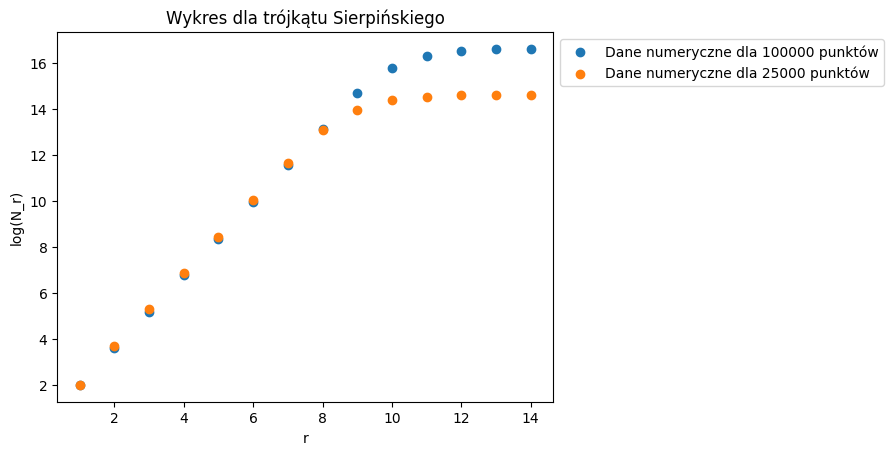

In [3]:
# trójkąt

values = []
for i in range(1, 15):
    A = np.histogram2d(positions[:, 1], positions[:, 0], bins = 2**i)
    values.append((np.count_nonzero(A[0])))

values_small = []
for i in range(1, 15):
    A = np.histogram2d(positions_small[:, 1], positions_small[:, 0], bins = 2**i)
    values_small.append((np.count_nonzero(A[0])))

# plot

opis = []
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(range(1, 15), np.log(values) / np.log(2))
opis.append('Dane numeryczne dla 100000 punktów')
plt.scatter(range(1, 15), np.log(values_small) / np.log(2))
opis.append('Dane numeryczne dla 25000 punktów')
plt.xlabel('r')
plt.ylabel('log(N_r)')
plt.title('Wykres dla trójkątu Sierpińskiego')
plt.legend(opis, bbox_to_anchor = [1, 1])
plt.show()

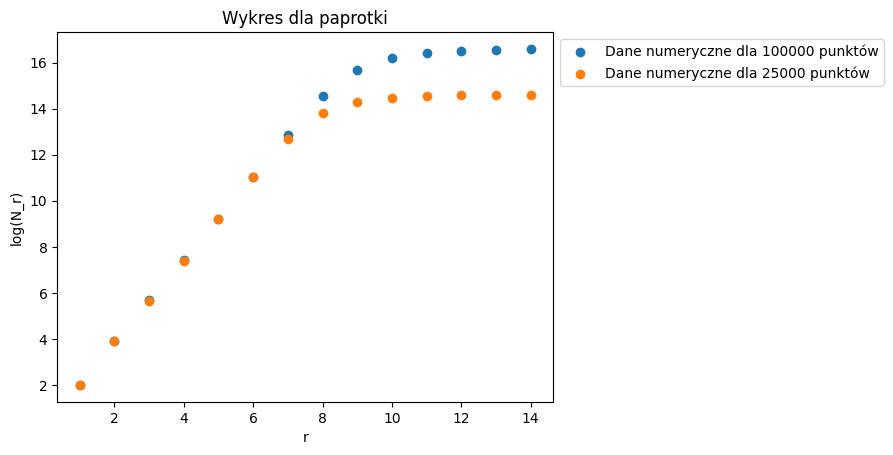

In [4]:
# paprotka

values2 = []
for i in range(1, 15):
    A = np.histogram2d(paprotka[:, 1], paprotka[:, 0], bins = 2**i)
    values2.append((np.count_nonzero(A[0])))

values_small2 = []
for i in range(1, 15):
    A = np.histogram2d(paprotka_small[:, 1], paprotka_small[:, 0], bins = 2**i)
    values_small2.append((np.count_nonzero(A[0])))

# plot

opis = []
plt.scatter(range(1, 15), np.log(values2) / np.log(2))
opis.append('Dane numeryczne dla 100000 punktów')
plt.scatter(range(1, 15), np.log(values_small2) / np.log(2))
opis.append('Dane numeryczne dla 25000 punktów')
plt.xlabel('r')
plt.ylabel('log(N_r)')
plt.title('Wykres dla paprotki')
plt.legend(opis, bbox_to_anchor = [1, 1])
plt.show()

# ZADANIE 3

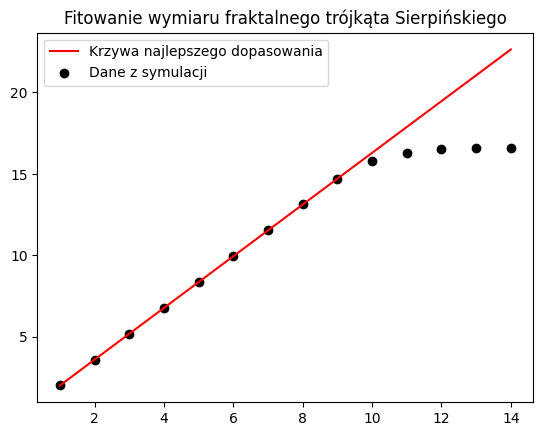

Metodą dopasowywania krzywej obliczono wymiar fraktalny trójkąta Sierpińskiego na 1.5879 +- 0.0026.


In [5]:
# overkill

def linear(x, a, b):
    return a*x + b

# rename datasets to be fitted

X_triangle = range(1, 15)
Y_triangle = np.log(values) / np.log(2)
X_papr = range(1, 15)
Y_papr = np.log(values2) / np.log(2)

# calculations

parameters1, covariance1 = curve_fit(linear, X_triangle[:9], Y_triangle[:9])
Y_triangle_predict = [parameters1[0] * x + parameters1[1] for x in X_triangle]

# plot

opis = []
plt.plot(X_triangle, Y_triangle_predict, color = 'red')
opis.append('Krzywa najlepszego dopasowania')
plt.scatter(X_triangle, Y_triangle, color = 'black')
opis.append('Dane z symulacji')
plt.legend(opis)
plt.title('Fitowanie wymiaru fraktalnego trójkąta Sierpińskiego')
plt.show()

# Results

print('Metodą dopasowywania krzywej obliczono wymiar fraktalny trójkąta Sierpińskiego na ' + str(round(parameters1[0], 4)) + ' +- ' + str(round(np.sqrt(covariance1[0, 0]), 4)) + '.')




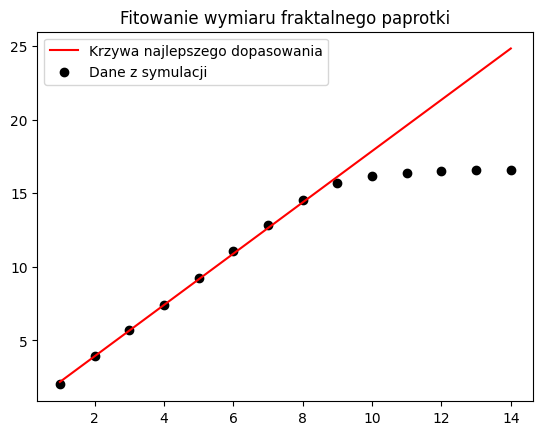

Metodą dopasowywania krzywej obliczono wymiar fraktalny paprotki na 1.7447 +- 0.0283.


In [6]:
# calculations

parameters2, covariance2 = curve_fit(linear, X_papr[:9], Y_papr[:9])
Y_papr_predict = [parameters2[0] * x + parameters2[1] for x in X_papr]

# plot

opis2 = []
plt.plot(X_papr, Y_papr_predict, color = 'red')
opis2.append('Krzywa najlepszego dopasowania')
plt.scatter(X_papr, Y_papr, color = 'black')
opis2.append('Dane z symulacji')
plt.legend(opis2)
plt.title('Fitowanie wymiaru fraktalnego paprotki')
plt.show()

# Results

print('Metodą dopasowywania krzywej obliczono wymiar fraktalny paprotki na ' + str(round(parameters2[0], 4)) + ' +- ' + str(round(np.sqrt(covariance2[0, 0]), 4)) + '.')



# Smok fraktalny

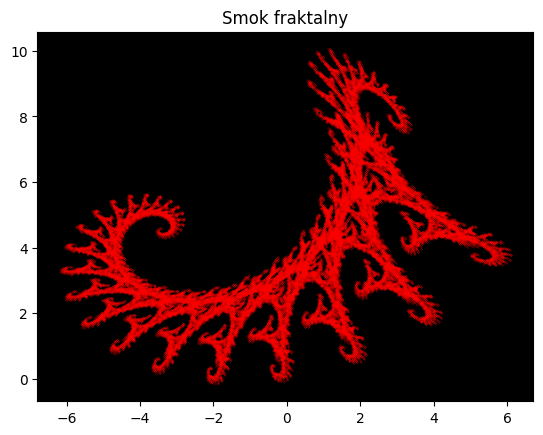

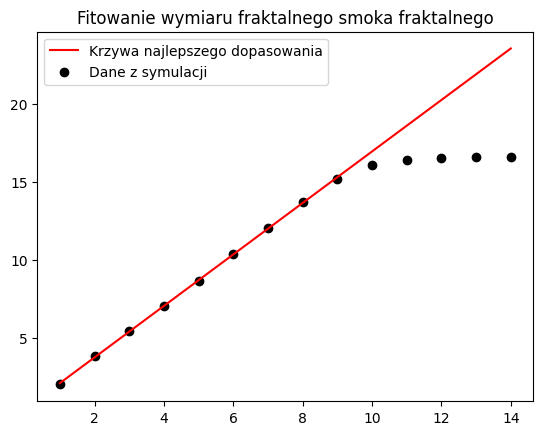

Metodą dopasowywania krzywej obliczono wymiar fraktalny smoka fraktalnego na 1.6539 +- 0.0096.


In [9]:
# creation of list of positions

steps_num = 100000

points1 = np.zeros([steps_num, 2])

# constants

d1 = [0.824074, 0.281482, -0.212346, 0.864198, -1.882290, -0.110607]
d2 = [0.088272, 0.520988, -0.463889, -0.377778, 0.785360, 8.095795]

dragon_param = [d1, d2]

# numerical calculations

for step in range(steps_num - 1):
    x_new = next_point(points1[step, :], dragon_param[np.random.choice([0, 1], p = [0.787473, 0.212527])])
    points1[step + 1, :] = x_new

# plot of the fractal

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(points1[:, 0], points1[:, 1], s = 0.01, color = 'red')
plt.title('Smok fraktalny')
plt.show()

# fitting fractal dimension

values3 = []
for i in range(1, 15):
    A = np.histogram2d(points1[:, 1], points1[:, 0], bins = 2**i)
    values3.append((np.count_nonzero(A[0])))

X_dragon = range(1, 15)
Y_dragon = np.log(values3) / np.log(2)

# calculations

parameters3, covariance3 = curve_fit(linear, X_dragon[:9], Y_dragon[:9])
Y_dragon_predict = [parameters3[0] * x + parameters3[1] for x in X_dragon]

# plot

opis = []
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(X_dragon, Y_dragon_predict, color = 'red')
opis.append('Krzywa najlepszego dopasowania')
plt.scatter(X_dragon, Y_dragon, color = 'black')
opis.append('Dane z symulacji')
plt.legend(opis)
plt.title('Fitowanie wymiaru fraktalnego smoka fraktalnego')
plt.show()

# Results

print('Metodą dopasowywania krzywej obliczono wymiar fraktalny smoka fraktalnego na ' + str(round(parameters3[0], 4)) + ' +- ' + str(round(np.sqrt(covariance3[0, 0]), 4)) + '.')

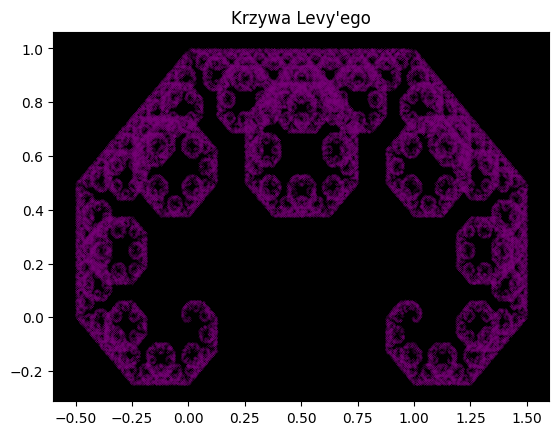

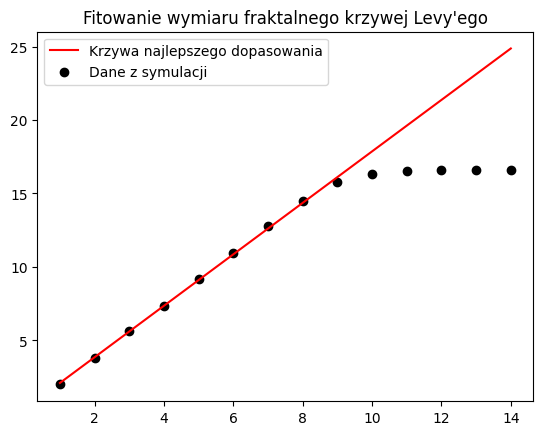

Metodą dopasowywania krzywej obliczono wymiar fraktalny krzywej Levy'egp na 1.751 +- 0.021.


In [8]:
# creation of list of positions

steps_num = 100000

points2 = np.zeros([steps_num, 2])

# constants

l1 = [0.5, -0.5, 0.5, 0.5, 0.0, 0.0]
l2 = [0.5, 0.5, -0.5, 0.5, 0.5, 0.5]

levy_param = [l1, l2]

# numerical calculations

for step in range(steps_num - 1):
    x_new = next_point(points2[step, :], levy_param[np.random.choice([0, 1])])
    points2[step + 1, :] = x_new

# plot of the fractal

plt.rcParams['axes.facecolor'] = 'black'
plt.scatter(points2[:, 0], points2[:, 1], s = 0.01, color = 'purple')
plt.title('Krzywa Levy\'ego')
plt.show()

# fitting fractal dimension

values4 = []
for i in range(1, 15):
    A = np.histogram2d(points2[:, 1], points2[:, 0], bins = 2**i)
    values4.append((np.count_nonzero(A[0])))

X_levy = range(1, 15)
Y_levy = np.log(values4) / np.log(2)

# calculations

parameters4, covariance4 = curve_fit(linear, X_levy[:9], Y_levy[:9])
Y_levy_predict = [parameters4[0] * x + parameters4[1] for x in X_levy]

# plot

opis = []
plt.rcParams['axes.facecolor'] = 'white'
plt.plot(X_levy, Y_levy_predict, color = 'red')
opis.append('Krzywa najlepszego dopasowania')
plt.scatter(X_levy, Y_levy, color = 'black')
opis.append('Dane z symulacji')
plt.legend(opis)
plt.title('Fitowanie wymiaru fraktalnego krzywej Levy\'ego')
plt.show()

# Results

print('Metodą dopasowywania krzywej obliczono wymiar fraktalny krzywej Levy\'egp na ' + str(round(parameters4[0], 3)) + ' +- ' + str(round(np.sqrt(covariance4[0, 0]), 3)) + '.')